# Market Sales Prediction

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
sns.set_style('whitegrid')
warnings.filterwarnings('ignore')

# EDA

In [2]:
df = pd.read_csv('bigmarket.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df.shape

(8523, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Categorical Features:
- Item_Identifier
- Item_Fat_Content
- Item_Type
- Outlet_Indentifier
- Outlet_Size
- Outlet_Location-Type
- Outlet_Type

In [5]:
# checking for missing values
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Handling Missing Values

- MEAN -> AVERAGE
- MODE -> MORE REPEATED VALUE

In [6]:
df['Item_Weight'].mean()

12.857645184135976

In [7]:
# filling missing values in "Item-Weight" with MEAN VALUE
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)

In [8]:
# Mode of "Outlet_Size" column
df['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [9]:
# filling the missing values in "Outlet_Size" column with Mode
mode_of_Outlet_size = df.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

In [10]:
print(mode_of_Outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [11]:
miss_values = df['Outlet_Size'].isnull()

In [12]:
print(miss_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [13]:
df.loc[miss_values, 'Outlet_Size'] = df.loc[miss_values, 'Outlet_Type'].apply(lambda x:mode_of_Outlet_size[x])

In [14]:
#checking for missing values
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# Data Analysis

In [15]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


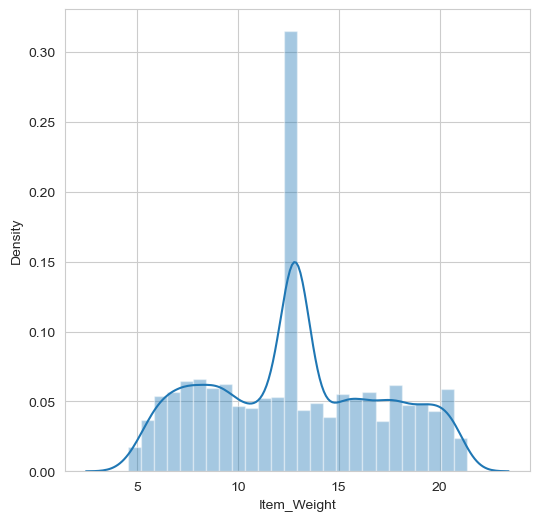

In [16]:
# Item_Weight distribution
plt.figure(figsize=(6,6))
sns.distplot(df['Item_Weight'])
plt.show()

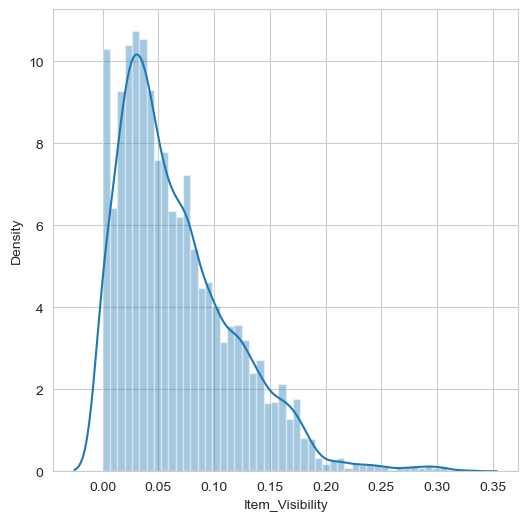

In [17]:
# Item Visibility distribution
plt.figure(figsize=(6,6))
sns.distplot(df['Item_Visibility'])
plt.show()

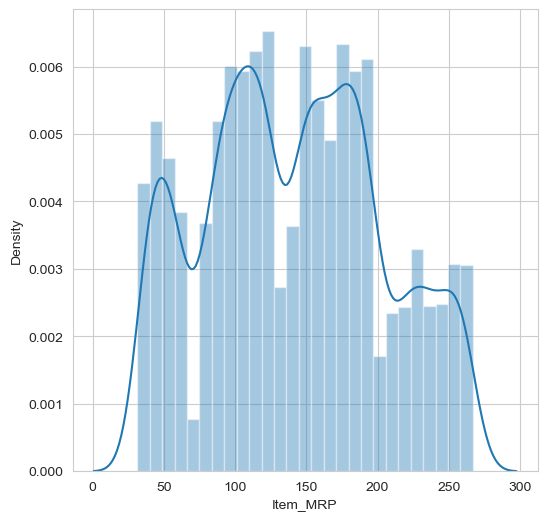

In [18]:
# Item MRP distribution
plt.figure(figsize=(6,6))
sns.distplot(df['Item_MRP'])
plt.show()

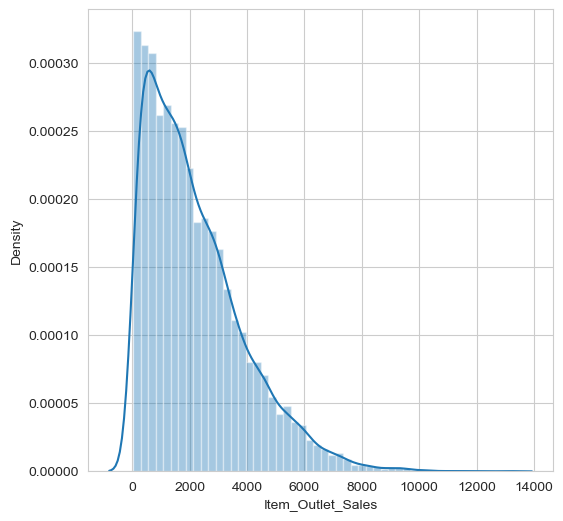

In [19]:
# Item_Outlet_Sales distribution
plt.figure(figsize=(6,6))
sns.distplot(df['Item_Outlet_Sales'])
plt.show()

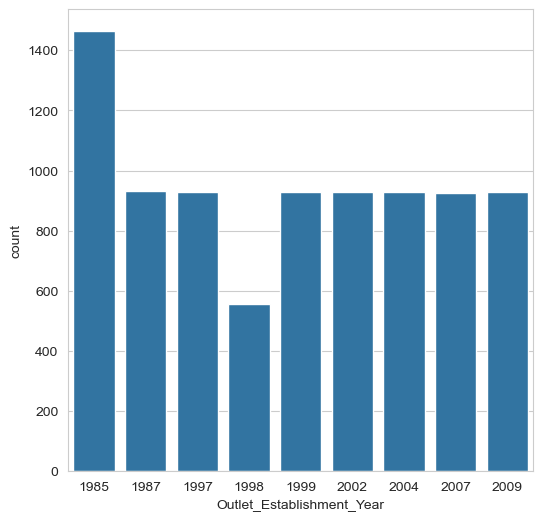

In [20]:
# Outlet_Establishment_Year column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year', data=df)
plt.show()

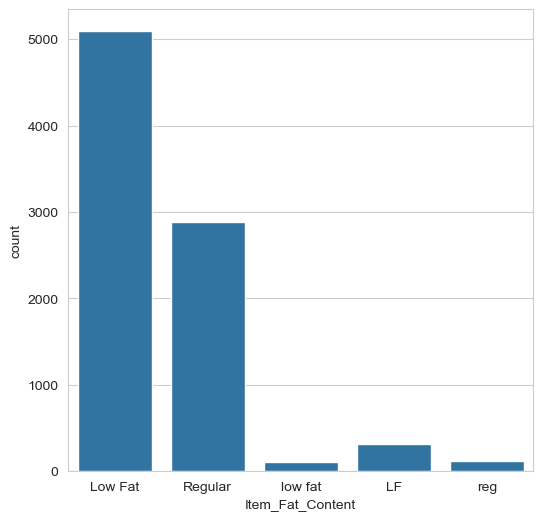

In [21]:
# Item_Fat_Content column
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content', data=df)
plt.show()

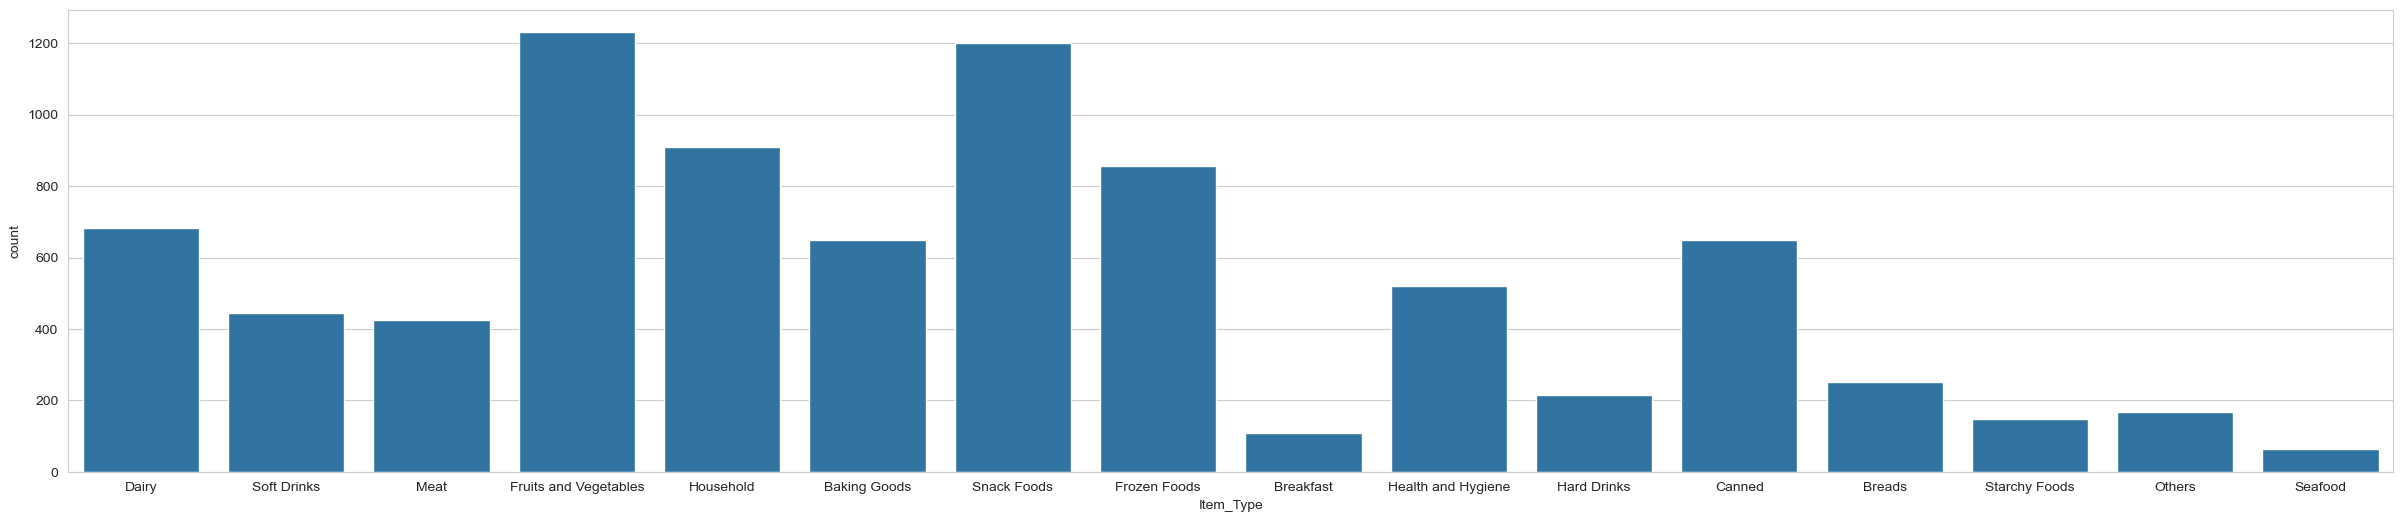

In [22]:
# Item_Type column
plt.figure(figsize=(30,6))
sns.countplot(x='Item_Type', data=df)
plt.show()

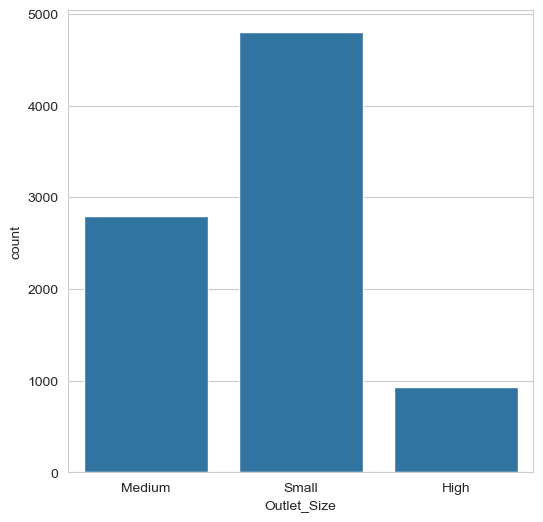

In [23]:
# Outlet_Size column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size', data=df)
plt.show()

# Data Pre-Processing

In [26]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [27]:
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [28]:
df.replace({'Item_Fat_Content':{'low fat':'Low Fat', 'LF':'Low Fat', 'reg':'Regular'}},inplace=True)

In [29]:
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

### Label Encoding

In [33]:
from sklearn.preprocessing import LabelEncoder

In [34]:
encoder = LabelEncoder()

In [35]:
df['Item_Identifier'] = encoder.fit_transform(df['Item_Identifier'])

df['Item_Fat_Content'] = encoder.fit_transform(df['Item_Fat_Content'])

df['Item_Type'] = encoder.fit_transform(df['Item_Type'])

df['Outlet_Identifier'] = encoder.fit_transform(df['Outlet_Identifier'])

df['Outlet_Size'] = encoder.fit_transform(df['Outlet_Size'])

df['Outlet_Location_Type'] = encoder.fit_transform(df['Outlet_Location_Type'])

df['Outlet_Type'] = encoder.fit_transform(df['Outlet_Type'])

In [36]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


# Splitting features and Target

In [37]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [38]:
print(X)

[[1.560e+02 9.300e+00 0.000e+00 ... 1.000e+00 0.000e+00 1.000e+00]
 [8.000e+00 5.920e+00 1.000e+00 ... 1.000e+00 2.000e+00 2.000e+00]
 [6.620e+02 1.750e+01 0.000e+00 ... 1.000e+00 0.000e+00 1.000e+00]
 ...
 [1.357e+03 1.060e+01 0.000e+00 ... 2.000e+00 1.000e+00 1.000e+00]
 [6.810e+02 7.210e+00 1.000e+00 ... 1.000e+00 2.000e+00 2.000e+00]
 [5.000e+01 1.480e+01 0.000e+00 ... 2.000e+00 0.000e+00 1.000e+00]]


In [39]:
print(y)

[3735.138   443.4228 2097.27   ... 1193.1136 1845.5976  765.67  ]


# Splitting into Train Test Split

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [41]:
print(X.shape, X_train.shape, X_test.shape)

(8523, 11) (6818, 11) (1705, 11)


# Training Algortihm

In [50]:
!pip install tensorflow

  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     ------------------------- -------------- 30.7/48.7 kB 1.3 MB/s eta 0:00:01
     -------------------------------------- 48.7/48.7 kB 409.3 kB/s eta 0:00:00
   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 0.1/390.3 MB 2.6 MB/s eta 0:02:28
   ---------------------------------------- 0.1/390.3 MB 2.6 MB/s eta 0:02:28
   ---------------------------------------- 0.2/390.3 MB 1.6 MB/s eta 0:04:03
   ---------------------------------------

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [52]:
model = Sequential()

model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(5, activation='relu'))

model.add(Dense(1)) # output layer

model.compile(optimizer='rmsprop', loss='mse')

In [53]:
model.fit(x = X_train, y = y_train, epochs=50)

Epoch 1/50
214/214 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 4491601.0000
Epoch 2/50
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2866771.7500
Epoch 3/50
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2685726.0000
Epoch 4/50
214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2707737.7500
Epoch 5/50
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2534719.5000
Epoch 6/50
214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2623220.5000
Epoch 7/50
214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2527937.7500
Epoch 8/50
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2323326.5000
Epoch 9/50
214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2180381.7500
Epoch 10/50
214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1973386.0000
Epoch 11/50
214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2008740.2500
Epoch 12/50
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1952935.2500
Epoch 13/50
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1913934.5000
Epoch 14/50
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms

In [54]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 20)                  │             240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,024 (4.00 KB)

 Trainable params: 511 (2.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 513 (2.01 KB)

In [55]:
loss_df = pd.DataFrame(model.history.history)

In [56]:
loss_df

,loss
0,3538560.750
1,2826948.250
2,2745524.750
3,2681390.000
4,2609279.000
5,2519785.500
6,2409351.750
7,2264219.750
8,2122998.500
9,2004601.250


<Axes: >

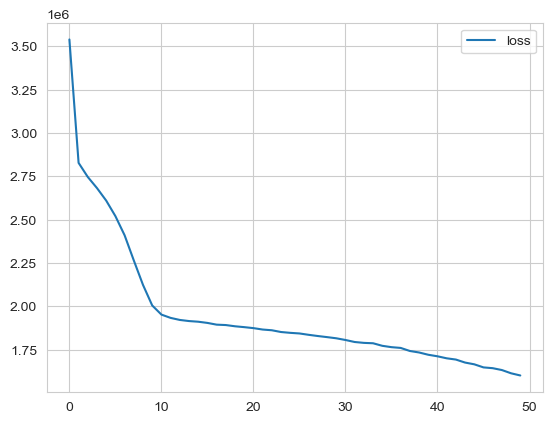

In [57]:
loss_df.plot()

From above graph we can say that loss of our model decreasing significantly.

# Model Evaluation

In [58]:
# Model evaluation on test data
test_eval = model.evaluate(X_test, y_test, verbose=0)
print(test_eval)

1598881.375


In [59]:
# model evaluation on train set
train_eval = model.evaluate(X_train, y_train, verbose=0)
print(train_eval)

1586536.5


In [60]:
# Checking difference between train_eval and test_eval
model_diff = train_eval - test_eval
print(model_diff)

-12344.875


In [61]:
# Train prediction on test data
train_prediction = model.predict(X_train)

214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [62]:
# Test prediction on test data
test_prediction = model.predict(X_test)

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [63]:
print(train_prediction)

[[2647.3894 ]
 [ 896.56036]
 [1059.4183 ]
 ...
 [1218.8655 ]
 [2030.259  ]
 [3299.642  ]]


In [64]:
print(test_prediction)

[[2783.0044 ]
 [1651.307  ]
 [1656.4684 ]
 ...
 [4042.3362 ]
 [ 441.01218]
 [4838.8057 ]]


In [65]:
# R Squared : R-squared measures the strength of the relationship between your model and the dependent variable on a convenient 0 – 100% scale.
from sklearn.metrics import r2_score
r2_train = r2_score(y_train, train_prediction)

In [66]:
print('R squared value of train data:', r2_train)

R squared value of train data: 0.4544247544219854


In [67]:
r2_test = r2_score(y_test, test_prediction)

In [68]:
print('R squared value of test data:',r2_test)

R squared value of test data: 0.4537212351667669
